In [1]:
# import all libraries

import pandas as pd #basic
import numpy as np #basic
import pandas_profiling as pp #EDA

from scipy.stats import shapiro #Stats
from scipy.stats import pearsonr #Stats
import scipy.stats as stats #Stats

import plotly.express as px #visualization
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
import plotly.figure_factory as ff#visualization

from sklearn.model_selection import train_test_split #Split data
from sklearn import preprocessing #manipulate data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score

from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
pio.renderers.default = "png"

### Read the input file and check the data dimension

In [2]:
df= pd.read_csv('german_credit.csv')

In [3]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1000
Columns  :  21

Features : 
 ['default', 'account_check_status', 'duration_in_month', 'credit_history', 'purpose', 'credit_amount', 'savings', 'present_emp_since', 'installment_as_income_perc', 'personal_status_sex', 'other_debtors', 'present_res_since', 'property', 'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job', 'people_under_maintenance', 'telephone', 'foreign_worker']

Missing values :   0

Unique values :  
 default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [5]:
# data manipulation/ data cleansing

In [6]:
df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
# Make default  yes or no
df['default'] = df['default'].replace({0: 'No', 1: 'Yes'})

df['has_telephone'] = df['telephone'].replace({
    'none': 'No',
    'yes, registered under the customers name ': 'Yes'
})
df.drop('telephone', axis=1, inplace=True)

df['account_check_status'] = df['account_check_status'].replace({
    'no checking account': '0 : No',
    '< 0 DM': '1 : Low',
    '0 <= ... < 200 DM': '3 : Med',
    '>= 200 DM / salary assignments for at least 1 year': '4 : High',
})

df['credit_history_rating'] = df['credit_history'].replace({
    'no credits taken/ all credits paid back duly': '5',
    'existing credits paid back duly till now': '4',
    'all credits at this bank paid back duly': '3',
    'critical account/ other credits existing (not at this bank)': '2',
    'delay in paying off in the past': '1',
})
df.drop('credit_history', axis=1, inplace=True)

df['savings_rating'] = df['savings'].replace({
    '.. >= 1000 DM ': '4 : Highly Rich',
    '500 <= ... < 1000 DM ': '3 : Rich',
    '100 <= ... < 500 DM': '2 : Avg',
    '... < 100 DM': '1 : Low',
    'unknown/ no savings account': '0 : No Savings',
})
df.drop('savings', axis=1, inplace=True)

df['Gender'] = df['personal_status_sex'].replace({
    'male : divorced/separated': 'Male',
    'male : married/widowed': 'Male',
    'female : divorced/separated/married': 'Female',
    'male : single': 'Male'
})
df.drop('personal_status_sex', axis=1, inplace=True)

df['property'] = df['property'].replace({
    'if not A121/A122 : car or other, not in attribute 6': 'Vehicle',
    'real estate': 'Real Estate',
    'if not A121 : building society savings agreement/ life insurance': 'Bonds or Agreements',
    'unknown / no property': 'No Property'
})

df['housing'] = df['housing'].replace({
    'own': 'Own',
    'rent': 'Rent',
    'for free': 'Free'
})

df['job'] = df['job'].replace({
    'skilled employee / official': 'Skilled',
    'management/ self-employed/ highly qualified employee/ officer': 'Highly Skilled',
    'unskilled - resident': 'Unskilled - Resident',
    'unemployed/ unskilled - non-resident': 'Unskilled - Non Resident',
})

df['emp_duration'] = df['present_emp_since'].replace({
    'unemployed': '0 : NA',
    '... < 1 year ': '1 : Low',
    '1 <= ... < 4 years': '2 : Med',
    '4 <= ... < 7 years': '3 : High',
    '.. >= 7 years': '4 : Very High',
})
df.drop('present_emp_since', axis=1, inplace=True)

df['Loan_Type'] = df['purpose'].replace({
    'domestic appliances': 'House',
    'radio/television': 'House',
    'furniture/equipment': 'House',
    'repairs': 'House',
    'car (new)': 'Vehicle',
    'car (used)': 'Vehicle',
    'business': 'Business',
    '(vacation - does not exist?)': 'Personal',
    'education': 'Education',
    'retraining': 'Education',
})
df.drop('purpose', axis=1, inplace=True)

In [8]:
# Separating customers who took df vs who didnt
df_viz=df.copy()
is_default = df_viz[df_viz['default'] == 'Yes']
not_default = df_viz[df_viz['default'] == 'No']

In [9]:
# Separating catagorical and numerical columns

Id_col = ['']
target_col = ['default']
exclude = ['']
cat_cols = df_viz.nunique()[df_viz.nunique() < 4].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col + exclude]
bin_cols = df_viz.nunique()[df_viz.nunique() < 3].keys().tolist()
cat_cols = [x for x in cat_cols if x not in ['Gender']]
num_cols = [x for x in df_viz.columns if x not in cat_cols
            + target_col + Id_col + exclude]

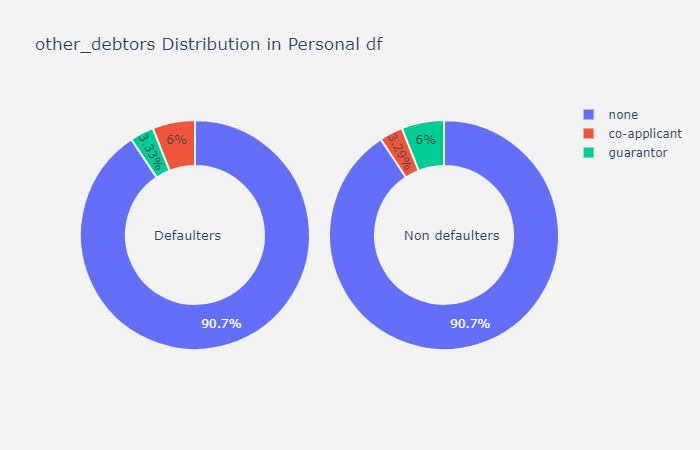

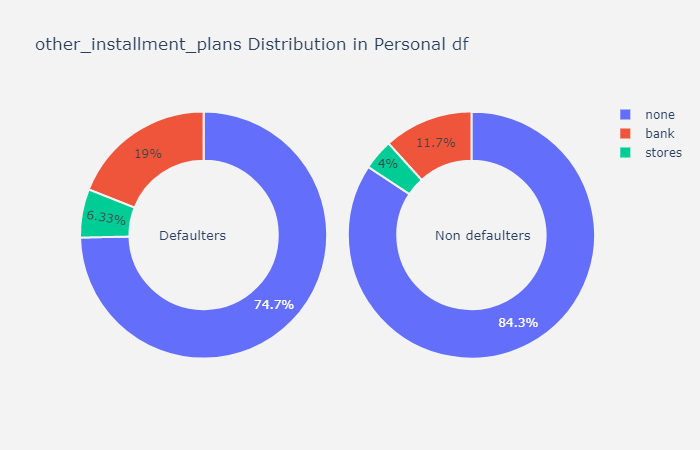

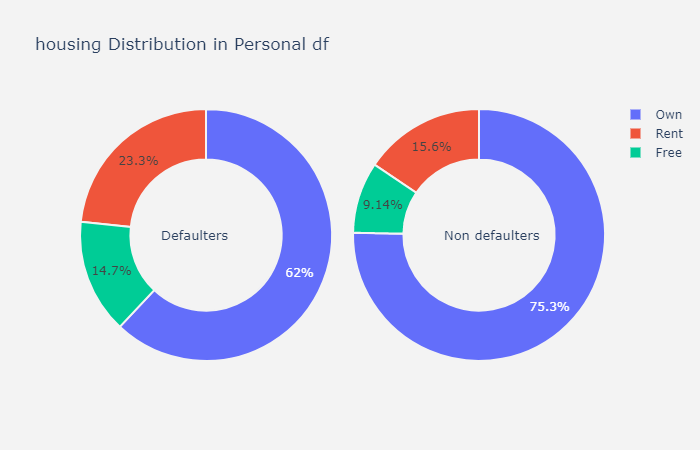

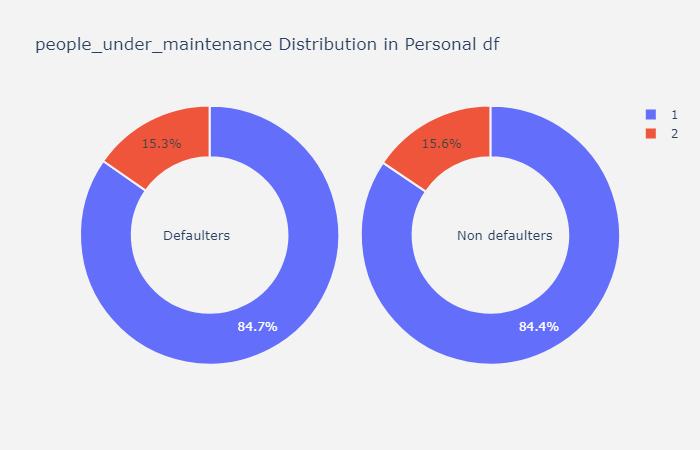

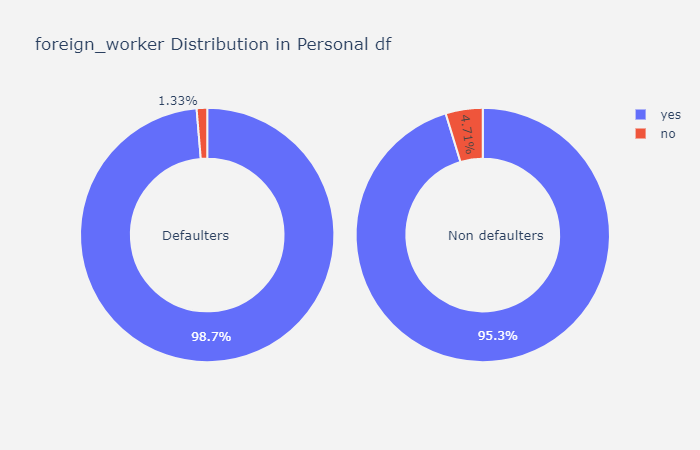

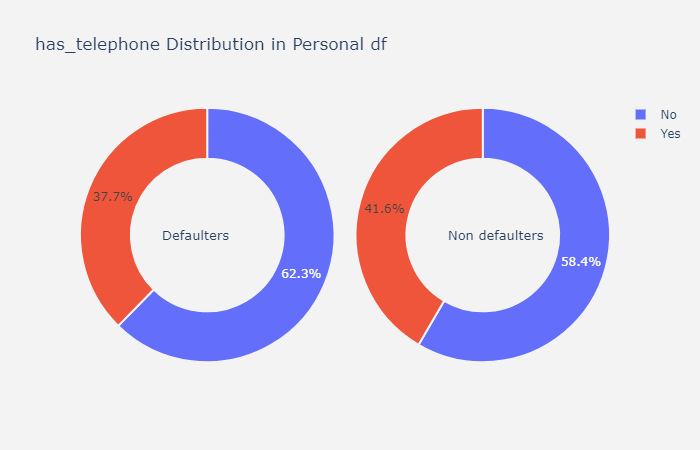

In [10]:





def plot_pie(column):

    trace1 = go.Pie(
        values=is_default[column].value_counts().values.tolist(),
        labels=is_default[column].value_counts().keys().tolist(),
        hoverinfo='label+percent+name',
        domain=dict(x=[0, .48]),
        name='default Customers',
        marker=dict(line=dict(width=2, color='rgb(243,243,243)')),
        hole=.6,
        )
    trace2 = go.Pie(
        values=not_default[column].value_counts().values.tolist(),
        labels=not_default[column].value_counts().keys().tolist(),
        hoverinfo='label+percent+name',
        marker=dict(line=dict(width=2, color='rgb(243,243,243)')),
        domain=dict(x=[.52, 1]),
        hole=.6,
        name='Non Loan Customers',
        )

    layout = go.Layout(dict(title=column
                       + ' Distribution in Personal df ',
                       plot_bgcolor='rgb(243,243,243)',
                       paper_bgcolor='rgb(243,243,243)',
                       annotations=[dict(text='Defaulters'
                       , font=dict(size=13), showarrow=False, x=.15,
                       y=.5), dict(text='Non defaulters',
                       font=dict(size=13), showarrow=False, x=.88,
                       y=.5)]))

    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


    # for all categorical columns plot pie

for i in cat_cols:
    plot_pie(i)

In [11]:
bin_cols

['default',
 'people_under_maintenance',
 'foreign_worker',
 'has_telephone',
 'Gender']

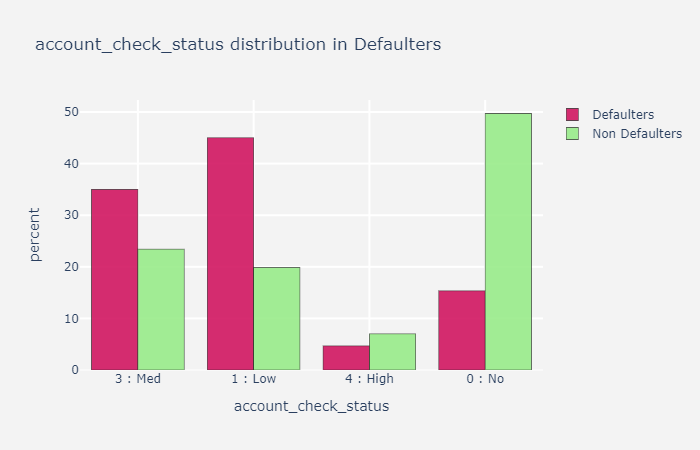

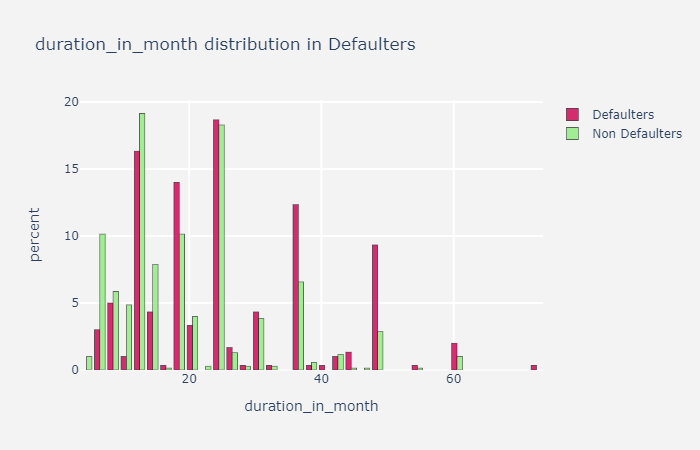

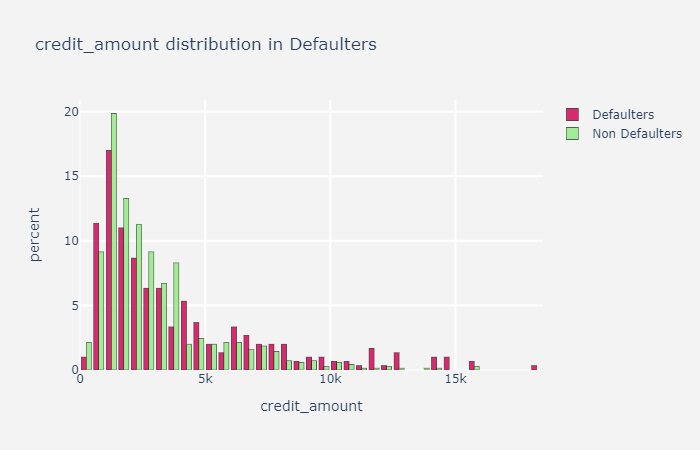

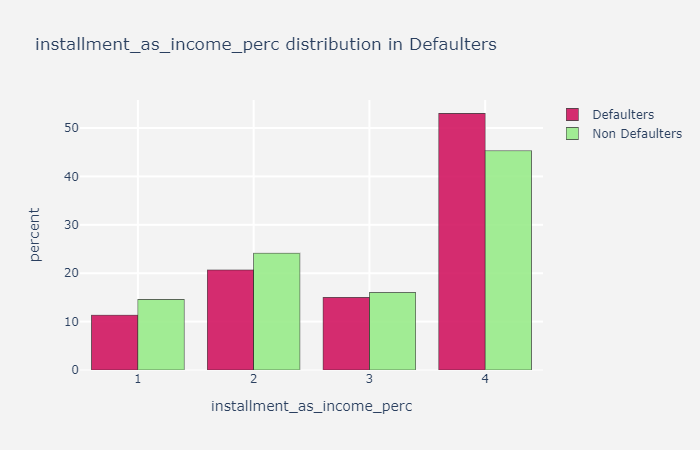

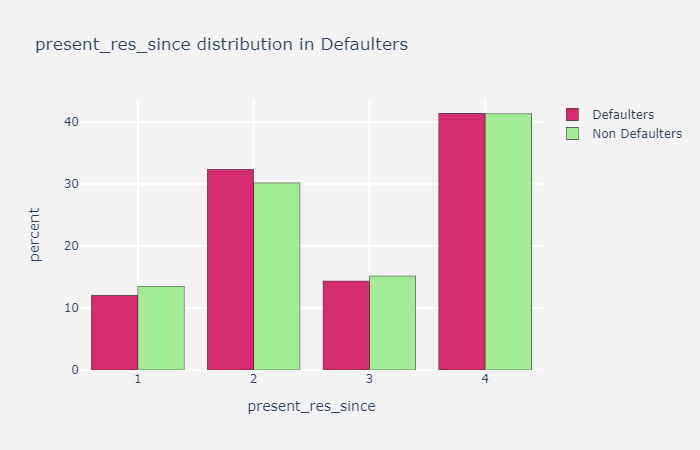

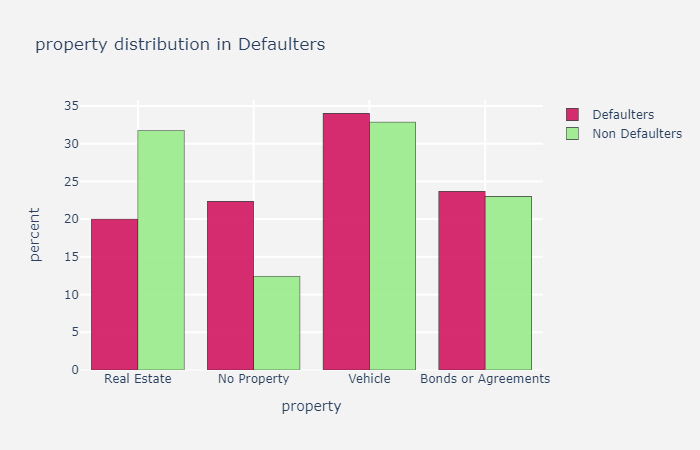

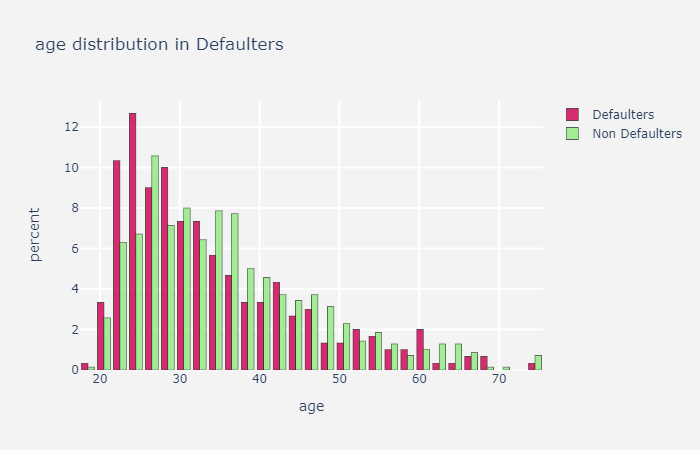

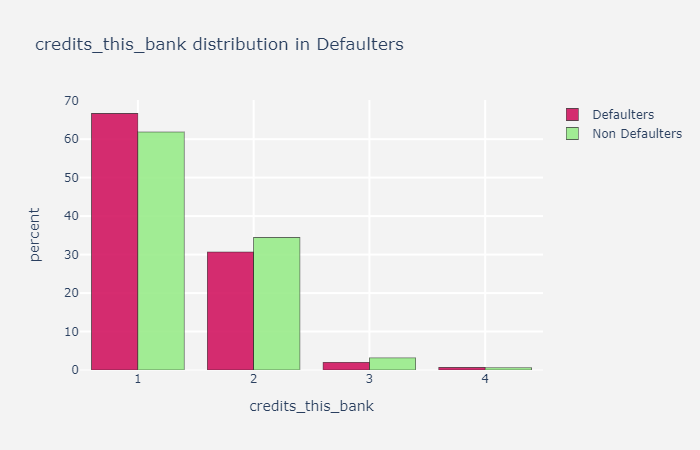

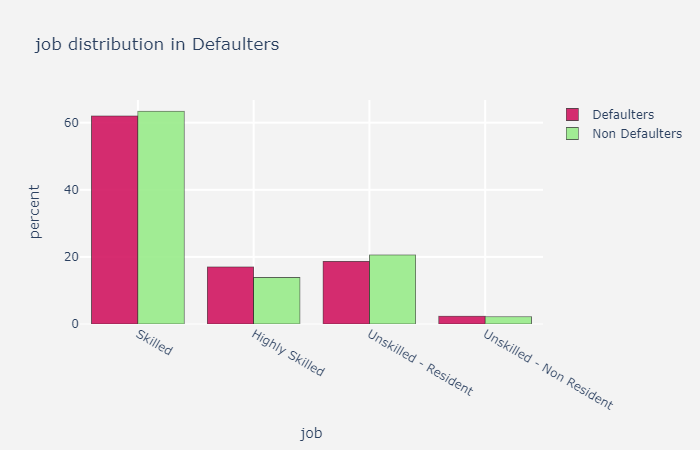

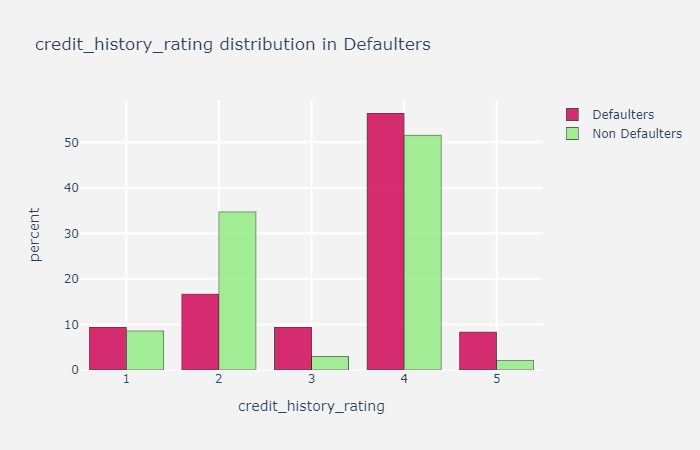

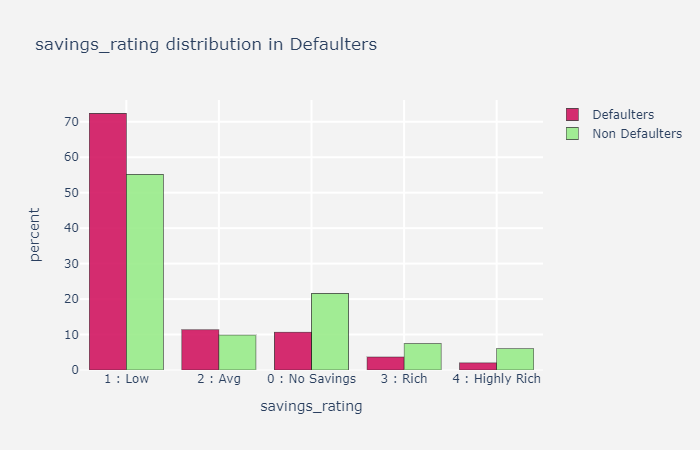

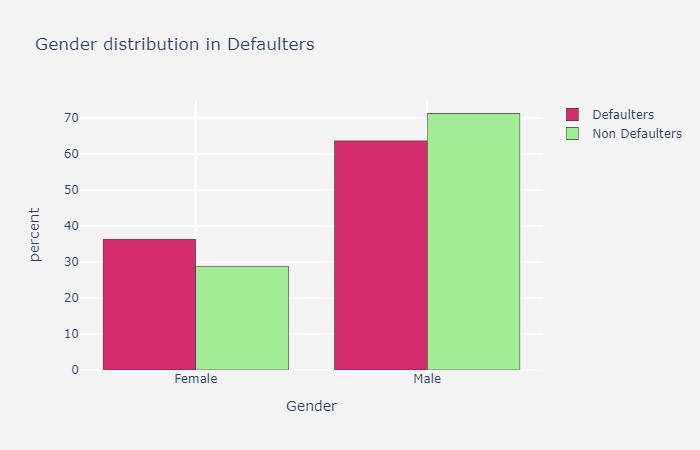

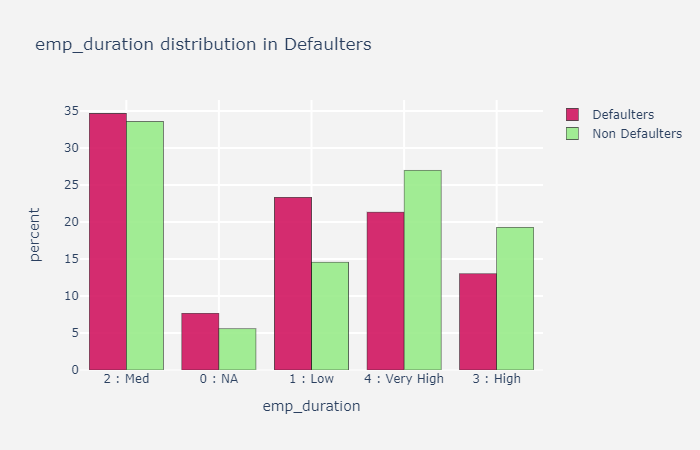

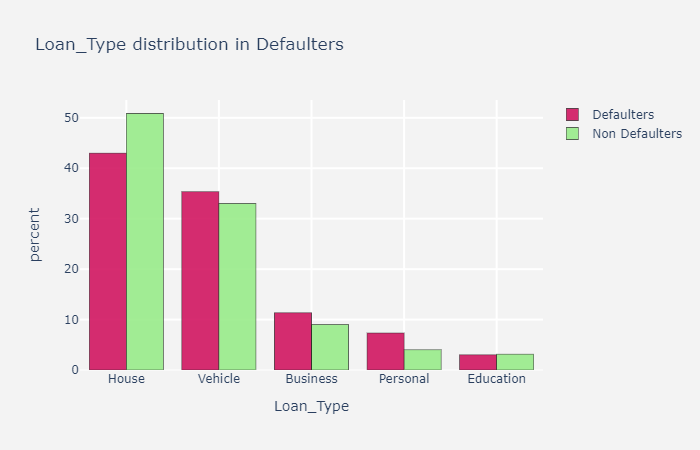

In [12]:
def histogram(column):
    trace1 = go.Histogram(x=is_default[column], histnorm='percent',
                          name='Defaulters',
                          marker_color='#d11560',
                          marker=dict(line=dict(width=.5, color='black'
                                                )), opacity=.9)

    trace2 = go.Histogram(x=not_default[column], histnorm='percent',
                          name='Non Defaulters',
                          
                          marker_color='#98eb89',
                          marker=dict(line=dict(width=.5, color='black'
                                                )), opacity=.9)
    data = [trace1, trace2]
    layout = go.Layout(dict(title=column
                            + ' distribution in Defaulters',
                            plot_bgcolor='rgb(243,243,243)',
                            paper_bgcolor='rgb(243,243,243)',
                            xaxis=dict(gridcolor='rgb(255, 255, 255)',
                                       title=column, zerolinewidth=1, ticklen=5,
                                       gridwidth=2),
                            yaxis=dict(gridcolor='rgb(255,255,255)',
                                       title='percent', zerolinewidth=1, ticklen=5,
                                       gridwidth=2)))
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


for i in num_cols:
    histogram(i)

In [13]:
df.head(5)

,default,account_check_status,duration_in_month,credit_amount,installment_as_income_perc,other_debtors,present_res_since,property,age,other_installment_plans,...,credits_this_bank,job,people_under_maintenance,foreign_worker,has_telephone,credit_history_rating,savings_rating,Gender,emp_duration,Loan_Type
0,No,1 : Low,6,1169,4,none,4,Real Estate,67,none,...,2,Skilled,1,yes,Yes,2,0 : No Savings,Male,4 : Very High,House
1,Yes,3 : Med,48,5951,2,none,2,Real Estate,22,none,...,1,Skilled,1,yes,No,4,1 : Low,Female,2 : Med,House
2,No,0 : No,12,2096,2,none,3,Real Estate,49,none,...,1,Unskilled - Resident,2,yes,No,2,1 : Low,Male,3 : High,Personal
3,No,1 : Low,42,7882,2,guarantor,4,Bonds or Agreements,45,none,...,1,Skilled,2,yes,No,4,1 : Low,Male,3 : High,House
4,Yes,1 : Low,24,4870,3,none,4,No Property,53,none,...,2,Skilled,2,yes,No,1,1 : Low,Male,2 : Med,Vehicle


In [14]:
df["account_check_status"].str.contains(':').values[0]

True

In [15]:
# bin_cols needs to be label encoded
le = LabelEncoder()
for i in ['default']:
    df[i] = le.fit_transform(df[i])
# all other columns needs to be checked for first value of integer and : then replace with integer
cols_with_lables = []
for i in df.columns:
    try:
        if df[i].str.contains(':').values[0]:
            cols_with_lables.append(i)
    except:
        # do nothing
        None
    
for i in cols_with_lables:
    df[i] = df[i].apply(lambda x: x[:1])
# for all continous columns bin them using qcut
df=df.apply(pd.to_numeric, errors='ignore')



In [16]:

df['job']

0                   Skilled
1                   Skilled
2      Unskilled - Resident
3                   Skilled
4                   Skilled
               ...         
995    Unskilled - Resident
996          Highly Skilled
997                 Skilled
998                 Skilled
999                 Skilled
Name: job, Length: 1000, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int32
account_check_status          1000 non-null int64
duration_in_month             1000 non-null int64
credit_amount                 1000 non-null int64
installment_as_income_perc    1000 non-null int64
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000 non-null object
people_under_maintenance      1000 non-null int64
foreign_worker                1000 non-null object
has_telephone                 1000 non-null object
credit_history_rating         1000 non-null int64
savings_rating                1000 no

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [18]:
df1,df2=train_test_split(df,test_size=.5)

In [19]:
# Lets build a Ensemble model but need to modify the dataset first
df1['emp_duration']


38     2
803    4
422    3
242    4
260    2
      ..
734    3
99     3
45     1
560    4
83     4
Name: emp_duration, Length: 500, dtype: int64

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [20]:
# Print Shape of model data
df1=pd.get_dummies(df1)
df1.shape

(500, 40)

### Check for highly correlated variables but don't required any treatment for this use case

In [21]:
df1.corr()

,default,account_check_status,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,credit_history_rating,...,foreign_worker_yes,has_telephone_No,has_telephone_Yes,Gender_Female,Gender_Male,Loan_Type_Business,Loan_Type_Education,Loan_Type_House,Loan_Type_Personal,Loan_Type_Vehicle
default,1.000000,0.145024,0.191744,0.120778,0.064209,-0.003131,-0.093973,-0.091811,-0.003180,0.151571,...,0.118787,0.036611,-0.036611,0.061338,-0.061338,0.001762,-0.035125,-0.021391,0.104169,-0.014125
account_check_status,0.145024,1.000000,-0.012240,-0.018656,-0.073436,-0.058441,-0.067897,-0.116597,-0.035157,0.108064,...,0.013963,0.088747,-0.088747,0.016715,-0.016715,0.058164,-0.011318,0.018564,-0.009615,-0.046988
duration_in_month,0.191744,-0.012240,1.000000,0.649628,0.066309,0.063997,0.008345,-0.027281,0.012292,-0.040793,...,0.189435,-0.210887,0.210887,-0.118667,0.118667,0.168230,-0.093640,-0.071292,0.000297,0.002978
credit_amount,0.120778,-0.018656,0.649628,1.000000,-0.276401,0.058313,0.078554,-0.012707,0.025721,-0.023531,...,0.120283,-0.278261,0.278261,-0.135696,0.135696,0.117226,-0.071917,-0.154907,-0.028170,0.127344
installment_as_income_perc,0.064209,-0.073436,0.066309,-0.276401,1.000000,0.026408,0.050040,0.014820,-0.069700,-0.018716,...,0.083709,-0.015929,0.015929,-0.064002,0.064002,-0.025388,-0.004889,0.060500,0.067286,-0.076610
present_res_since,-0.003131,-0.058441,0.063997,0.058313,0.026408,1.000000,0.250479,0.054301,0.048320,-0.059572,...,0.077705,-0.108052,0.108052,0.075351,-0.075351,-0.107433,0.064548,-0.087788,0.017888,0.127590
age,-0.093973,-0.067897,0.008345,0.078554,0.050040,0.250479,1.000000,0.139712,0.146320,-0.185673,...,0.022856,-0.152494,0.152494,-0.164156,0.164156,-0.039042,0.059745,-0.138870,0.045757,0.127752
credits_this_bank,-0.091811,-0.116597,-0.027281,-0.012707,0.014820,0.054301,0.139712,1.000000,0.136403,-0.518260,...,-0.003413,-0.036938,0.036938,-0.069932,0.069932,0.125398,0.039557,-0.103302,-0.038431,0.034526
people_under_maintenance,-0.003180,-0.035157,0.012292,0.025721,-0.069700,0.048320,0.146320,0.136403,1.000000,-0.054284,...,-0.086505,0.025931,-0.025931,-0.187951,0.187951,0.027668,0.048898,-0.165257,0.014458,0.132221
credit_history_rating,0.151571,0.108064,-0.040793,-0.023531,-0.018716,-0.059572,-0.185673,-0.518260,-0.054284,1.000000,...,-0.039110,0.049065,-0.049065,0.125562,-0.125562,-0.071840,0.017524,0.102532,-0.057954,-0.042491


### Drop the original variables which are converted to dummy

dropped already

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [22]:
X=df1.drop('default',axis=1)
y = df1['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6933333333333334
[[90  9]
 [37 14]]


### Q6 Show the list of the features importance( 1 Marks)

In [25]:
model.feature_importances_

array([0.09203844, 0.08247929, 0.11194544, 0.03958007, 0.04289683,
       0.09258558, 0.02017673, 0.01569581, 0.04436246, 0.05131232,
       0.0483024 , 0.00875232, 0.00618523, 0.00924899, 0.01383803,
       0.01443631, 0.01895524, 0.0164282 , 0.01771949, 0.02469169,
       0.01028688, 0.01265789, 0.01924065, 0.01019517, 0.01015815,
       0.01774108, 0.00118351, 0.01470767, 0.00263641, 0.00275458,
       0.01641812, 0.01662142, 0.01514524, 0.01550235, 0.0084266 ,
       0.00251984, 0.01836996, 0.01627215, 0.01753149])

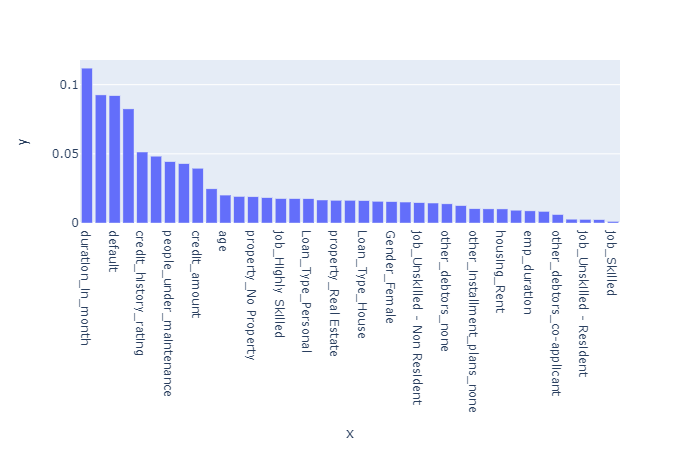

In [26]:
import plotly.express as px
coefficients = pd.DataFrame(model.feature_importances_)
cols=df1.columns
column_df = pd.DataFrame(cols)
coef_sumry = (pd.merge(coefficients, column_df, left_index=True,
                       right_index=True, how="left"))
coef_sumry.columns = ["coefficients", "features"]
coef_sumry = coef_sumry.sort_values(by="coefficients", ascending=False)
px.bar(y=coef_sumry['coefficients'],x=coef_sumry['features'])
# coef_sumry

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
# Use below values
num_folds = 10
seed = 77
kf = KFold(n_splits=num_folds
           ,random_state=seed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [29]:
#Validate the Random Forest model build above using k fold

In [30]:
from sklearn.model_selection import KFold  
from sklearn import metrics  
from sklearn.preprocessing import StandardScaler
#kf=KFold(n_splits=num_folds,shuffle=True,random_state=77)   
list_mse=[]  
X=df1.drop('default',axis=1)
Y = df1['default']  
Accuracy_score=[]      
for train,test in kf.split(X,Y):  
#     Xtrain,Xtest=X.iloc[train],X.iloc[test]  
#     Ytrain,Ytest=Y[train],Y[test]                 
    model.fit(X.iloc[train], y.iloc[train])          
    Y_predict = model.predict(X.iloc[test])              
    #mse=np.sum((Ytest-Y_predict)**2)/len(Ytest)             
    #mse=metrics.mean_squared_error(Ytest,Y_predict)     
    acc1=metrics.accuracy_score(y.iloc[test],Y_predict)
    Accuracy_score.append(acc1) 
    print(acc1) 
    


0.8
0.8
0.74
0.7
0.74
0.74
0.54
0.72
0.72
0.64


In [31]:
#Calculate Mean score

In [32]:
print("Mean Accuracy score: %0.02f " % (np.mean(Accuracy_score)))

Mean Accuracy score: 0.71 


In [33]:
# Calculate score standard deviation using std()

In [34]:
print("standard deviation is :(+/- %0.5f)  " % (np.std(Accuracy_score)))

standard deviation is :(+/- 0.07269)  


# Q8 Print the confusion matrix( 1 Marks)

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(estimator = model, X = X_test, y = y_test, cv = num_folds)
conf_mat = confusion_matrix(y_test, y_pred)

#Confusion Matrix
conf_mat

array([[91,  8],
       [29, 22]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_test, y = y_test, cv = num_folds)
print(accuracies.mean())
print(accuracies.std())
probabilities = model.predict_proba(X_test)
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

#print(metrics.confusion_matrix(y_train, y_pred))

TP = conf_mat[1, 1]
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]

#TP = 12
#TN = 192
#FP = 22
#FN = 74

print(' Percentage of correct predictions:  ',((TP + TN) / float(TP + TN + FP + FN) * 100))

0.7533333333333333
0.05206833117271106
0.7533333333333333
Accuracy: 0.75 (+/- 0.10)
 Percentage of correct predictions:   75.33333333333333


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [37]:
#Hint: Use roc_curve

In [38]:
import plotly.graph_objs as go  # visualization
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under curve : ", model_roc_auc, "\n")
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1])


Area under curve :  0.6752822341057636 



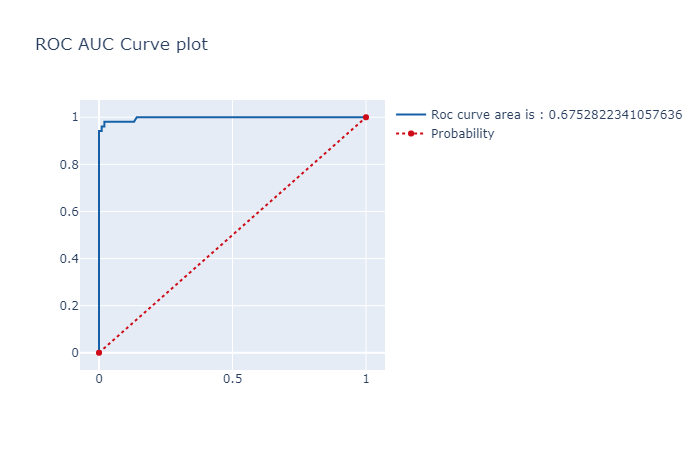

In [39]:
trace2 = go.Scatter(x=fpr, y=tpr,
                    name="Roc curve area is : " + str(model_roc_auc),
                    line=dict(color=('rgb(22, 96, 167)'), width=2))
trace3 = go.Scatter(x=[0, 1], y=[0, 1],name='Probability',
                    line=dict(color=('rgb(205, 12, 24)'), width=2,
                              dash='dot'))
data=[trace2,trace3]
layout=go.Layout(dict(title=dict(text="ROC AUC Curve plot")))
fig = go.Figure(
    data,layout    
)
fig.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [40]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6752822341057636


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [41]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [42]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    model.fit(X_, y_)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [43]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6846666666666666
Standard deviation:  0.014621141466307537
